In [1]:
import requests
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from dotenv import load_dotenv 
import os
import time

https://aqs.epa.gov/aqsweb/documents/data_api.html

In [2]:
load_dotenv()
email = os.getenv("email")
key = os.getenv("epa_key") 
debug = os.getenv("DEBUG", "False") 

In [3]:
la_bounds_gdf = gpd.read_file("../../Data/Inputs/Boundary_Shapefile/la_mainland.geojson")

In [61]:
sensors_gdf = gpd.read_file('../../Data/Outputs/sensors.geojson')

In [23]:
def get_response(url):
    try: 
        response = requests.get(url)
        data = response.json()
        return data
    except requests.exceptions.HTTPError as e:
        print(f'{e}')

In [80]:
def to_gdf(data):
    temp_df = pd.DataFrame(data['Data'])
    temp_gdf = gpd.GeoDataFrame(
   temp_df, geometry=gpd.points_from_xy(temp_df['longitude'], temp_df['latitude']), crs="EPSG:4326"
)
    return temp_gdf

### Signup

https://aqs.epa.gov/aqsweb/documents/data_api.html#signup

This only needs to be run once, or if you lost your API key and need a new one emailed to you:

email_query = get_response(f'https://aqs.epa.gov/data/api/signup?email={email}')

email_query

### State codes

https://aqs.epa.gov/aqsweb/documents/data_api.html#lists

In [15]:
states = get_response(f'https://aqs.epa.gov/data/api/list/states?email={email}&key={key}')

In [19]:
states['Data'][:10]

[{'code': '01', 'value_represented': 'Alabama'},
 {'code': '02', 'value_represented': 'Alaska'},
 {'code': '04', 'value_represented': 'Arizona'},
 {'code': '05', 'value_represented': 'Arkansas'},
 {'code': '06', 'value_represented': 'California'},
 {'code': '08', 'value_represented': 'Colorado'},
 {'code': '09', 'value_represented': 'Connecticut'},
 {'code': '10', 'value_represented': 'Delaware'},
 {'code': '11', 'value_represented': 'District Of Columbia'},
 {'code': '12', 'value_represented': 'Florida'}]

In [30]:
state = '06'

### County Codes

https://aqs.epa.gov/aqsweb/documents/data_api.html#lists

In [35]:
counties = get_response(f'https://aqs.epa.gov/data/api/list/countiesByState?email={email}&key={key}&state=06')

KeyboardInterrupt: 

In [29]:
counties['Data'][18]

{'code': '037', 'value_represented': 'Los Angeles'}

### Sites by County

https://aqs.epa.gov/aqsweb/documents/data_api.html#lists

In [33]:
la_sites = get_response(f'https://aqs.epa.gov/data/api/list/sitesByCounty?email={email}&key={key}&state=06&county=037')

In [36]:
la_sites['Data'][:10]

[{'code': '0001', 'value_represented': None},
 {'code': '0002', 'value_represented': 'Azusa'},
 {'code': '0003', 'value_represented': None},
 {'code': '0004', 'value_represented': None},
 {'code': '0005', 'value_represented': None},
 {'code': '0008', 'value_represented': None},
 {'code': '0009', 'value_represented': None},
 {'code': '0016', 'value_represented': 'Glendora'},
 {'code': '0017', 'value_represented': None},
 {'code': '0018', 'value_represented': 'El Monte'}]

### Parameter Classes

In [37]:
param_classes = get_response(f'https://aqs.epa.gov/data/api/list/classes?email={email}&key={key}')

In [38]:
param_classes['Data']

[{'code': 'AIRNOW MAPS',
  'value_represented': 'The parameters represented on AirNow maps (88101, 88502, and 44201)'},
 {'code': 'ALL', 'value_represented': 'Select all Parameters Available'},
 {'code': 'AQI POLLUTANTS',
  'value_represented': 'Pollutants that have an AQI Defined'},
 {'code': 'CORE_HAPS', 'value_represented': 'Urban Air Toxic Pollutants'},
 {'code': 'CRITERIA', 'value_represented': 'Criteria Pollutants'},
 {'code': 'CSN DART',
  'value_represented': 'List of CSN speciation parameters to populate the STI DART tool'},
 {'code': 'FORECAST',
  'value_represented': 'Parameters routinely extracted by AirNow (STI)'},
 {'code': 'HAPS', 'value_represented': 'Hazardous Air Pollutants'},
 {'code': 'IMPROVE CARBON', 'value_represented': 'IMPROVE Carbon Parameters'},
 {'code': 'IMPROVE_SPECIATION',
  'value_represented': 'PM2.5 Speciated Parameters Measured at IMPROVE sites'},
 {'code': 'MET', 'value_represented': 'Meteorological Parameters'},
 {'code': 'NATTS CORE HAPS',
  'value

### Parameters in Class

In [39]:
class_name = 'PM2.5 MASS/QA'
PM_class = get_response(f'https://aqs.epa.gov/data/api/list/parametersByClass?email={email}&key={key}&pc={class_name}')

In [67]:
PM_class['Data']

[{'code': '68101', 'value_represented': 'Sample Flow Rate- CV'},
 {'code': '68102', 'value_represented': 'Sample Volume'},
 {'code': '68103', 'value_represented': 'Ambient Min Temperature'},
 {'code': '68104', 'value_represented': 'Ambient Max Temperature'},
 {'code': '68105', 'value_represented': 'Average Ambient Temperature'},
 {'code': '68106', 'value_represented': 'Sample Min Baro Pressure'},
 {'code': '68107', 'value_represented': 'Sample Max Baro Pressure'},
 {'code': '68108', 'value_represented': 'Average Ambient Pressure'},
 {'code': '68109', 'value_represented': 'Elapsed Sample Time'},
 {'code': '88101', 'value_represented': 'PM2.5 - Local Conditions'}]

There is a class called 'ALL'

In [68]:
param_classes['Data'][1]

{'code': 'ALL', 'value_represented': 'Select all Parameters Available'}

Seeing what 'ALL' does:

In [70]:
class_name = 'ALL'
ALL_class = PM_class = get_response(f'https://aqs.epa.gov/data/api/list/parametersByClass?email={email}&key={key}&pc={class_name}')

In [74]:
all_classes = ALL_class['Data']

In [75]:
len(all_classes)

1372

In [77]:
all_classes[:20]

[{'code': '11101', 'value_represented': 'Suspended particulate (TSP)'},
 {'code': '11102', 'value_represented': 'Suspended particulate (TSP) LC'},
 {'code': '11103', 'value_represented': 'Benzene soluble organics (TSP)'},
 {'code': '11104', 'value_represented': 'Total polynuclear hydrocarbons'},
 {'code': '11114', 'value_represented': 'Windblown particulate'},
 {'code': '11121', 'value_represented': 'Crystalline quartz'},
 {'code': '11122', 'value_represented': 'Cristabalite'},
 {'code': '11123', 'value_represented': 'Asbestos > 5um'},
 {'code': '11124', 'value_represented': 'Asbestos > 0.5um'},
 {'code': '11125', 'value_represented': 'Total non-asbestos fibers'},
 {'code': '11201', 'value_represented': 'Soil index (COH)'},
 {'code': '11202', 'value_represented': 'Soil index (RUD)'},
 {'code': '11203', 'value_represented': 'Light scatter'},
 {'code': '11204', 'value_represented': 'Smoke'},
 {'code': '11205', 'value_represented': 'Soil index (ug/m3)'},
 {'code': '11206', 'value_represen

Smoke and windblown particulate could be useful

In [73]:
len(ALL_class['Data'])

1372

In [81]:
param = '11204'
test2 = get_response(f'https://aqs.epa.gov/data/api/monitors/byCounty?email={email}&key={key}&param={param}&bdate={startdate}&edate={enddate}&state=06&county=037')

In [82]:
test2_gdf = to_gdf(test2)

KeyError: 'longitude'

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), label='Inline label');
sensors_gdf.plot(ax=ax, color='none', edgecolor='blue');
test2_gdf.plot(ax=ax, color='none', edgecolor='red');
la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
ax.set_title('EPA and OpenAQ PM2.5 Stations in Los Angeles County');

In [91]:
def plot_param(param, startdate='20160603', enddate='20251202'):
    temp_data = get_response(f'https://aqs.epa.gov/data/api/monitors/byCounty?email={email}&key={key}&param={param}&bdate={startdate}&edate={enddate}&state=06&county=037')    
    return temp_data
    #     temp_df = pd.DataFrame(temp_data['Data'])
#     return temp_df
#     temp_gdf = gpd.GeoDataFrame(
#     temp_df, geometry=gpd.points_from_xy(temp_df['longitude'], temp_df['latitude']), crs="EPSG:4326"
# )

#     fig, ax = plt.subplots(figsize=(10, 10), label='Inline label');
#     sensors_gdf.plot(ax=ax, color='none', edgecolor='blue');
#     PM25_gdf.plot(ax=ax, color='none', edgecolor='red');
#     la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
#     ax.set_title('EPA and OpenAQ PM2.5 Stations in Los Angeles County');
#     plt.plot()
#     return temp_gdf 

In [ ]:
test_data = plot_param('11204')

In [ ]:
test_data

In [87]:
temp_df = plot_param(11204)

In [88]:
temp_df.head()

""


In [90]:
len(temp_df)

0

### LA PM2.5 Monitors

In [43]:
PM25 = get_response(f'https://aqs.epa.gov/data/api/monitors/byCounty?email={email}&key={key}&param=88101&bdate=20160603&edate=20251202&state=06&county=037')

In [45]:
PM25.keys()

dict_keys(['Header', 'Data'])

In [46]:
PM25['Data'][0]

{'state_code': '06',
 'county_code': '037',
 'site_number': '1103',
 'parameter_code': '88101',
 'poc': 2,
 'parameter_name': 'PM2.5 - Local Conditions',
 'open_date': '1999-01-01',
 'close_date': None,
 'concurred_exclusions': None,
 'dominant_source': None,
 'measurement_scale': 'NEIGHBORHOOD',
 'measurement_scale_def': '500 M TO 4KM',
 'monitoring_objective': 'HIGHEST CONCENTRATION',
 'last_method_code': '145',
 'last_method_description': 'R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric',
 'last_method_begin_date': '2016-12-16',
 'naaqs_primary_monitor': None,
 'qa_primary_monitor': None,
 'monitor_type': 'SLAMS',
 'networks': None,
 'monitoring_agency_code': '0972',
 'monitoring_agency': 'South Coast Air Quality Management District',
 'si_id': 1081,
 'latitude': 34.06659,
 'longitude': -118.22688,
 'datum': 'WGS84',
 'lat_lon_accuracy': 0.0,
 'elevation': 87.0,
 'probe_height': None,
 'pl_probe_location': None,
 'local_site_name': 'Los Angeles-North Main Street'

In [48]:
PM25_df = pd.DataFrame(PM25['Data'])

In [49]:
PM25_df.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'parameter_name', 'open_date', 'close_date', 'concurred_exclusions',
       'dominant_source', 'measurement_scale', 'measurement_scale_def',
       'monitoring_objective', 'last_method_code', 'last_method_description',
       'last_method_begin_date', 'naaqs_primary_monitor', 'qa_primary_monitor',
       'monitor_type', 'networks', 'monitoring_agency_code',
       'monitoring_agency', 'si_id', 'latitude', 'longitude', 'datum',
       'lat_lon_accuracy', 'elevation', 'probe_height', 'pl_probe_location',
       'local_site_name', 'address', 'state_name', 'county_name', 'city_name',
       'cbsa_code', 'cbsa_name', 'csa_code', 'csa_name', 'tribal_code',
       'tribe_name'],
      dtype='object')

In [53]:
PM25_gdf = gpd.GeoDataFrame(
   PM25_df, geometry=gpd.points_from_xy(PM25_df['longitude'], PM25_df['latitude']), crs="EPSG:4326"
)

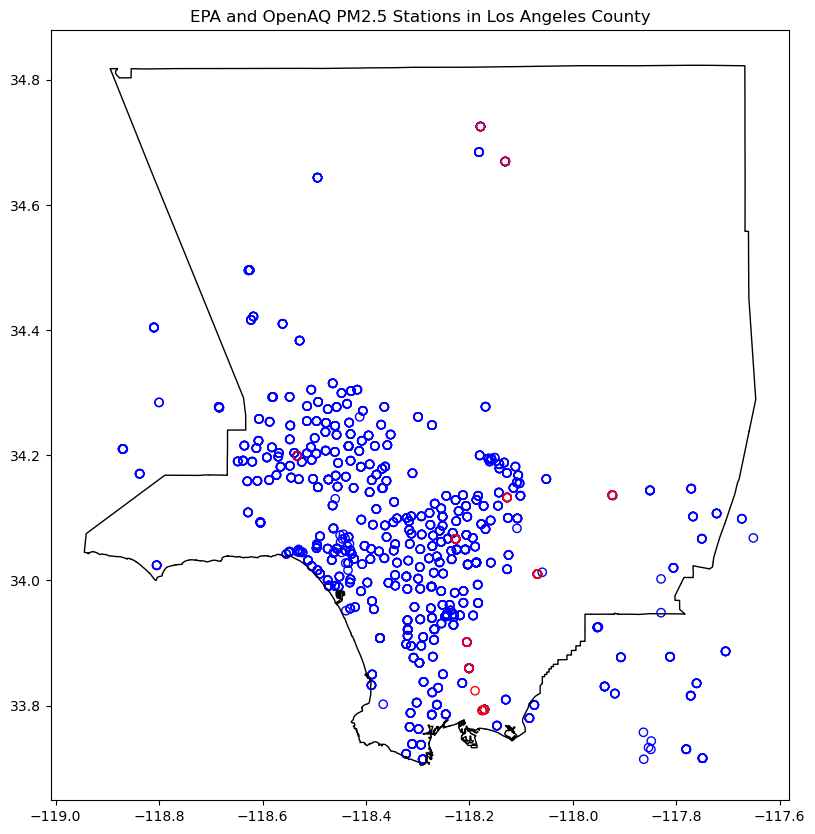

In [63]:
fig, ax = plt.subplots(figsize=(10, 10), label='Inline label');
sensors_gdf.plot(ax=ax, color='none', edgecolor='blue');
PM25_gdf.plot(ax=ax, color='none', edgecolor='red');
la_bounds_gdf.plot(ax=ax, color='none', edgecolor='black');
ax.set_title('EPA and OpenAQ PM2.5 Stations in Los Angeles County');

This doesn't seem to be helping in terms of providing more PM2.5 sensors in the sparse regions.

In [55]:
PM25_gdf.to_file('../../Data/Outputs/EPA_PM25.geojson',driver='geojson')